***What are the different types of Missing Data?***

1. **Missing Completely at Random, MCAR**: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. 
When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.
 In other words, those missing data points are a random subset of the data.
 There is nothing systematic going on that makes some data more likely to be missing than other.


In [ ]:
import pandas as pd
import numpy as np

Dataset = https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [ ]:
df = pd.read_csv("/content/train.csv")
pd.set_option("display.max_columns",None)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Embarkes is MCAR(missing completely at random)

In [ ]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df["Embarked"].mode()[0]

'S'

In [ ]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

**2.Missing Data Not at Random(MNAR) Systematic Missing Values**

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [ ]:
df['cabin_null']=np.where(df["Cabin"].isnull(),1,0)

#find percentage of a missing values
df["cabin_null"].mean()*100

#another way
df["Cabin"].isnull().sum()/len(df)*100

77.10437710437711

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [ ]:
df.groupby(["Survived"])["cabin_null"].sum()/len(df)*100

Survived
0    53.984287
1    23.120090
Name: cabin_null, dtype: float64

In [ ]:
df.groupby(["Survived"])["cabin_null"].mean()*100

Survived
0    87.613843
1    60.233918
Name: cabin_null, dtype: float64

In [ ]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

3. **Missing at Random(MAR)**

Men---Hide their Salary

Women --Hide their Age

In [ ]:
#All the techniques of handling the missing values
1.Mean,median mode Imputation
2.Random Sample Imputation
3.Capturing NAN values with a new features
4. End of Distribution imputation
5. Arbitrary Imputation
6. Frequent Categories Imputation 

**Mean,median mode imputation**

when should we apply?


Mean,median mode imputation has the assumption that data are missing completely at random(**MCAR**).We solve by replacing the NAN values with most frequent occurance of variables.

In [ ]:
df = pd.read_csv("/content/train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()/len(df)*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [ ]:
missing_values=df.isnull().sum()/len(df)*100
misssing_values=missing_values[missing_values!=0]

In [ ]:
df["Age_median"]= df["Age"].fillna(df["Age"].median())

In [ ]:
import matplotlib.pyplot as plt
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
df["Age_mode"] = df["Age"].fillna(df["Age"].mode()[0]) 

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_mode
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [ ]:
print(df["Age"].std())
print(df["Age_median"].std())
print(df["Age_mode"].std())

14.526497332334042
13.019696550973201
13.19957176774647


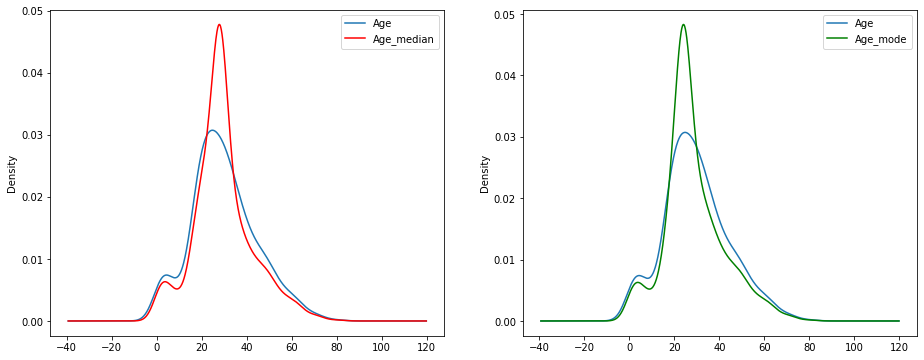

In [ ]:
plt.figure(1)
plt.subplot(131)
df["Age"].plot(kind="kde",figsize=(24,6))
df["Age_median"].plot(kind="kde",color="red")
plt.legend(loc="best")

plt.subplot(132)
df["Age"].plot(kind="kde",figsize=(24,6))
df["Age_mode"].plot(kind="kde",color="green")
plt.legend(loc="best")

Both mode and median is equally best for missing completely at random(MCAR).

**Advantages And Disadvantages**

#advantages
1. Easy to implement(Robust to outliers)
2 Faster way to obtain the complete

#disadvantages
1. Change or Distortion in the original variance
2. Impact Correlation

**Random Sample Imputation**

Aim= Random Sample Imputation consists of taking random observation from dataset we use this observation to replace NAN values.

when should it be used?

It assumes that the data are missing completely at random(MCAR).

In [ ]:
df = pd.read_csv("/content/train.csv",usecols=["Age","Fare","Survived"])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [ ]:
df["Age"].dropna().sample()

86    16.0
Name: Age, dtype: float64

In [ ]:
df["Age"].isnull().sum()

177

In [ ]:
#replacing all the nan values with some sampled values
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
df[df["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)
  df[variable+"_random"]=df[variable]
  #it will have the random sample to fill the na
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  #pandas need to have some index in order to  merge the dataset
  random_sample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [ ]:
median = df.Age.median()

In [ ]:
median

28.0

In [ ]:
impute_nan(df,"Age",median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [ ]:
import matplotlib.pyplot as plt


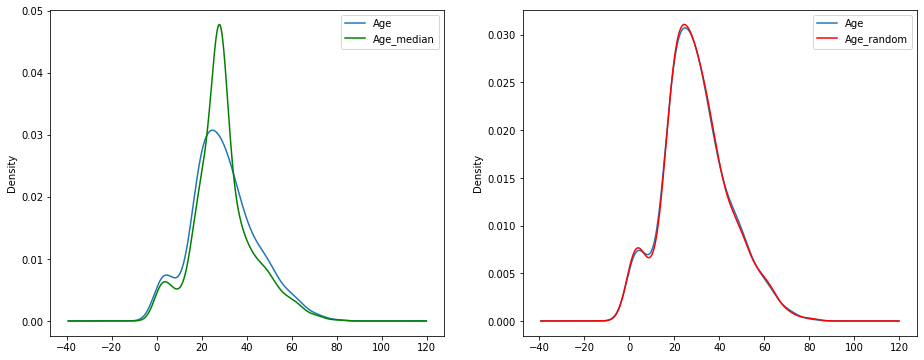

In [ ]:
plt.figure(1)
plt.subplot(131)
df["Age"].plot(kind="kde",figsize=(24,6))
df["Age_median"].plot(kind="kde",color="green")
plt.legend(loc="best")

plt.subplot(132)
df["Age"].plot(kind="kde",figsize=(24,6))
df["Age_random"].plot(kind="kde",color="red")
plt.legend(loc="best")
plt.show()

advantages:
1. easy to implement
2. There is less distortion in variance

disadvantages:
1. every situation randomness wont work
2. ​correlation is distorted

**3.Capturing NAN values with a new feature**

It works well if the data are not missing completely at random

In [ ]:
df = pd.read_csv("/content/train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
df["Age_NAN"]=np.where(df["Age"].isnull(),1,0)

In [ ]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
df.Age.median()

28.0

In [ ]:
df["Age"].fillna(df.Age.median(),inplace=True)

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#Advantages
1. Easy to implement
2. captures the importance of missing values

#Disadvantages
1. Creating Additional Features

**End of Distribution Imputation**

In [ ]:
df = pd.read_csv("/content/train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


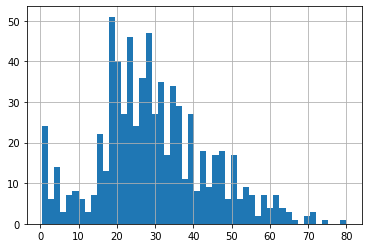

In [ ]:
df.Age.hist(bins=50)

In [ ]:
extreme=df.Age.mean()+3*df.Age.std()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


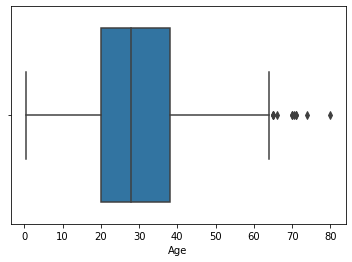

In [ ]:
import seaborn as sns
sns.boxplot("Age",data=df)

In [ ]:
def impute_nan(df,variable,median,extreme):
  df[variable+"_end_distibution"]=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,"Age",df.Age.median(),extreme)

In [ ]:
df.head()

,Survived,Age,Fare,Age_end_distibution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


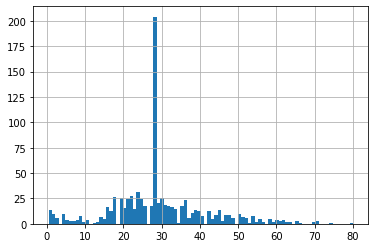

In [ ]:
df["Age"].hist(bins=90)

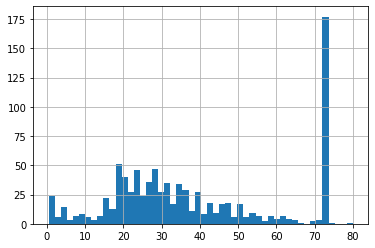

In [ ]:
df["Age_end_distibution"].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


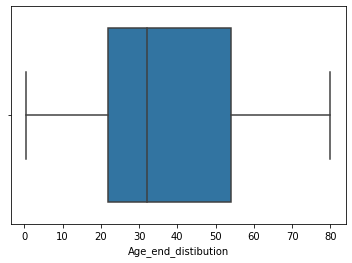

In [ ]:
sns.boxplot("Age_end_distibution",data=df)

Advantages:
1. Easy to implement
2. Captures the importance of missingness if there is one

disadvantages:
1. Dissorts the original distribution of the variable
2. If the number of NA is big.It will mask true outliers in the distribution.
3. If the number of NA is Small,the replaced NA may be considered as an outliers and preprocessed is subsequent feature enginnering.

**Arbitary Value Imputation**

It consists of replacing NAN values by an arbitary value.

This technique was derived from kaggle competition.

In [ ]:
df = pd.read_csv("/content/train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df,variable):
  df[variable+"_zero"]=df[variable].fillna(0)
  df[variable+"_hundered"]=df[variable].fillna(100)

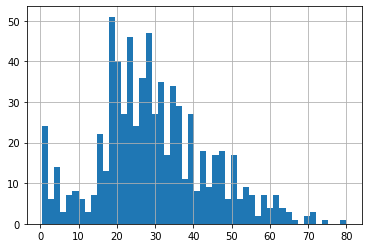

In [ ]:
df["Age"].hist(bins=50)

Advantages:
1. Easy to implement
2. Captures the importance of missingess if there is one

DisAdvantages:
1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use 

**How to Handle Categoical Missing values**

**Frequent Category Imputation**

In [ ]:
df=pd.read_csv("/content/train (1).csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.shape

(1460, 4)

In [ ]:
df.isnull().sum()/len(df)*100

BsmtQual        2.534247
FireplaceQu    47.260274
GarageType      5.547945
SalePrice       0.000000
dtype: float64

**Compute the frequency with every features**

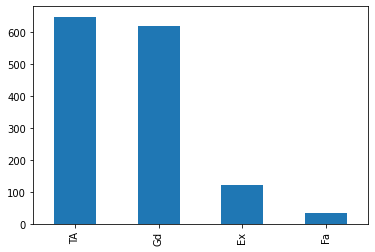

In [ ]:
df["BsmtQual"].value_counts().plot.bar()

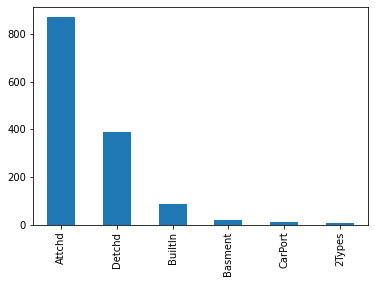

In [ ]:
df["GarageType"].value_counts().plot.bar()

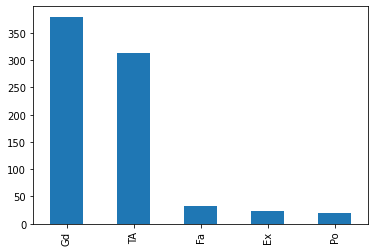

In [ ]:
df["FireplaceQu"].value_counts().plot.bar()

In [ ]:
def impute_nan(df,variable):
  mode_mean = df[variable].value_counts().index[0]
  df[variable].fillna(mode_mean,inplace=True)

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,feature)

In [ ]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

**Advantages**
1. Easy To implement
2. Fater way to implement 
**Disadvantages**
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

**Adding a variable to capture NAN**

In [ ]:
df=pd.read_csv("/content/train (1).csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
frequent=df['BsmtQual'].mode()[0]

In [ ]:
df["BsmtQual"].fillna(frequent,inplace=True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
df["FireplaceQu"]=df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])

In [ ]:
df["FireplaceQunp_var"]=np.where(df["FireplaceQu"].isnull(),1,0)

In [ ]:
df.drop(columns=["FireplaceQu_var"],axis=1,inplace=True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQunp_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


Adding a variable to capture NAN works well when we have more missing categorical values

**Suppose if you have more NAN frequent categories, we just replace NAN with a new category**

In [ ]:
df=pd.read_csv("/content/train (1).csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df["FireplaceQu_newvar"]=np.where(df["FireplaceQu"].isnull(),"missing",df.FireplaceQu)

In [ ]:
def impute_nan(df,variable):
  df[variable+"_newvar"]=np.where(df[variable].isnull(),"missing",df[variable])

In [ ]:
for feature in ['BsmtQual','GarageType']:
  impute_nan(df,feature)

In [ ]:
df["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
df["FireplaceQu_newvar"].value_counts()

missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQu_newvar, dtype: int64

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_newvar,BsmtQual_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,missing,Gd,Attchd
1,Gd,TA,Attchd,181500,TA,Gd,Attchd
2,Gd,TA,Attchd,223500,TA,Gd,Attchd
3,TA,Gd,Detchd,140000,Gd,TA,Detchd
4,Gd,TA,Attchd,250000,TA,Gd,Attchd


In [ ]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [ ]:
df["BsmtQual_newvar"].value_counts()

TA         649
Gd         618
Ex         121
missing     37
Fa          35
Name: BsmtQual_newvar, dtype: int64

In [ ]:
df=df.drop(['BsmtQual','GarageType','FireplaceQu'],axis=1)

In [ ]:
df.head()

,SalePrice,FireplaceQu_newvar,BsmtQual_newvar,GarageType_newvar
0,208500,missing,Gd,Attchd
1,181500,TA,Gd,Attchd
2,223500,TA,Gd,Attchd
3,140000,Gd,TA,Detchd
4,250000,TA,Gd,Attchd


**Handle Categorical Features**

**One Hot Encoding**

In [ ]:
df=pd.read_csv("/content/train.csv",usecols=["Sex"])

In [ ]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
pd.get_dummies(df)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [ ]:
df=pd.read_csv("/content/train.csv",usecols=["Embarked"])

In [ ]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [ ]:
df["Embarked"].nunique()

3

In [ ]:
df["Embarked"].isnull().sum()

2

In [ ]:
df["Embarked"].dropna(inplace=True)

In [ ]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [ ]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


**Onehotencoding with many categories in a feature**

In [ ]:
df = pd.read_csv("/content/mercedes.csv",usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [ ]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [ ]:
for i in df.columns:
  print(len(df[i].unique()))

47
27
44
7
4
29
12


In [ ]:
df.X1.value_counts().sort_values(ascending=False)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

In [ ]:
top10 = df.X1.value_counts().sort_values(ascending=False).head(10).index
top10 = list(top10)

In [ ]:
top10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [ ]:
for categories in top10:
  df[categories]=np.where(df["X1"]==categories,1,0)

In [ ]:
top10.append("X1")

In [ ]:
df[top10].head()

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v


**Ordinal Number Encoding**

In [ ]:
from datetime import datetime

In [ ]:
today_date=datetime.datetime.today()

In [ ]:
today_date

datetime.datetime(2022, 8, 18, 11, 19, 12, 426626)

In [ ]:
today_date-datetime.timedelta(1)

datetime.datetime(2022, 8, 17, 11, 19, 12, 426626)

In [ ]:
#subtracting today date to get yesturday date
#list comprehension
days=[today_date-datetime.timedelta(x) for  x in range(0,15)]

In [ ]:
data=pd.DataFrame(days,columns={"days"})

In [ ]:
data.head()

,days
0,2022-08-18 11:19:12.426626
1,2022-08-17 11:19:12.426626
2,2022-08-16 11:19:12.426626
3,2022-08-15 11:19:12.426626
4,2022-08-14 11:19:12.426626


In [ ]:
data["weekday"]=data["days"].dt.day_name()

In [ ]:
data.head()

,days,weekday
0,2022-08-18 11:19:12.426626,Thursday
1,2022-08-17 11:19:12.426626,Wednesday
2,2022-08-16 11:19:12.426626,Tuesday
3,2022-08-15 11:19:12.426626,Monday
4,2022-08-14 11:19:12.426626,Sunday


In [ ]:
dict = {"Sunday":1,"Monday":2,"Tuesday":3,"Wednesday":4,"Thursday":5,"Friday":6,"Saturday":7}

In [ ]:
print(dict)

{'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7}


In [ ]:
data["Weekday_ordinal"]=data["weekday"].map(dict)

In [ ]:
data.head()

,days,weekday,Weekday_ordinal
0,2022-08-18 11:19:12.426626,Thursday,5
1,2022-08-17 11:19:12.426626,Wednesday,4
2,2022-08-16 11:19:12.426626,Tuesday,3
3,2022-08-15 11:19:12.426626,Monday,2
4,2022-08-14 11:19:12.426626,Sunday,1


**Count or Frequency Encoding**

In [ ]:
train = pd.read_csv("/content/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
for feature in train.columns[:]:
  print(feature,":",len(train[feature].unique()),"labels")

PassengerId : 891 labels
Survived : 2 labels
Pclass : 3 labels
Name : 891 labels
Sex : 2 labels
Age : 89 labels
SibSp : 7 labels
Parch : 7 labels
Ticket : 681 labels
Fare : 248 labels
Cabin : 148 labels
Embarked : 4 labels


In [ ]:
age_map=train["Age"].value_counts().to_dict()

In [ ]:
train["Age"]=train["Age"].map(age_map)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,27.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,11.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,18.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,18.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,18.0,0,0,373450,8.0500,NaN,S


**Advantages**:
1. Easy to Use
2. Not increasing feature Space

**Disadvantages**:

1. It will provide same weight if the frequency are same 

**Target Guided Ordinal Encoding**

1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [ ]:
df = pd.read_csv("/content/train.csv",usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna('Missing',inplace=True)

In [ ]:
df["Cabin"]=df["Cabin"].astype(str).str[0]

In [ ]:
df.head()

,Survived,Cabin
0,0,n
1,1,C
2,1,n
3,1,C
4,0,n


In [ ]:
df.Cabin.unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [ ]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'n', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [ ]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'n', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [ ]:
enumerate(ordinal_labels,0)

In [ ]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'n': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [ ]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,n,1
1,1,C,4
2,1,n,1
3,1,C,4
4,0,n,1


**Mean Encoding**

In [ ]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [ ]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'T': 0.0,
 'n': 0.29985443959243085}

In [ ]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,n,1,0.299854
1,1,C,4,0.593220
2,1,n,1,0.299854
3,1,C,4,0.593220
4,0,n,1,0.299854


**Probability Ratio Encoding**

1. Probability of Survived based on Cabin--- Categorical Feature
2. Probability of Not Survived---1-pr(Survived)
3. pr(Survived)/pr(Not Survived)
4. Dictonary to map cabin with probability
5. replace with the categorical feature

In [ ]:
df=pd.read_csv('/content/train.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df["Cabin"].fillna("Missing",inplace=True)

In [ ]:
df["Cabin"].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [ ]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [ ]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()*100

In [ ]:
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,46.666667
B,74.468085
C,59.322034
D,75.757576
E,75.000000
F,61.538462
G,50.000000
M,29.985444
T,0.000000


In [ ]:
prob_df["Died"]= 100-prob_df["Survived"]

In [ ]:
prob_df.head()

,Survived,Died
Cabin,,
A,46.666667,53.333333
B,74.468085,25.531915
C,59.322034,40.677966
D,75.757576,24.242424
E,75.000000,25.000000


In [ ]:
prob_df["Probability_ratio"]=prob_df["Survived"]/prob_df["Died"]
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,46.666667,53.333333,0.875000
B,74.468085,25.531915,2.916667
C,59.322034,40.677966,1.458333
D,75.757576,24.242424,3.125000
E,75.000000,25.000000,3.000000


In [ ]:
probability_encoded = prob_df["Probability_ratio"].to_dict()

In [ ]:
df["Cabin_encoded"]= df.Cabin.map(probability_encoded)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
